In [1]:
"""
Created on May 1 2020

@author: Nkosi Mngomezulu
"""
# Importing packages
import pandas as pd
import numpy as np
import time 
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib as plt
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_10e3dfa569d64673a3c50397badabc76 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qx6wEPbafXCSaGG7OTI1CtcD9TMgTEEKbura7RRsMtBb',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_10e3dfa569d64673a3c50397badabc76.get_object(Bucket='seniorprojectpart1-donotdelete-pr-hpbnt6q4gnewbx',Key='GSAF.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [2]:
#Introduction

In [3]:
# So, for this dataset, I did some of the cleaning in Excel to try and save computational time. 
# It had 100,000 rows so it was much easier to clean in Excel and line up the columns well for the model.
# This would later help in building the model.

In [4]:
#printing initial dataframe top
df.head()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit
0,328,113,2,4,3,9.65,3.790,1,36,6,0,0,1,0,0,0.92
1,297,93,2,2,1,8.87,3.322,1,37,12,0,0,1,0,0,0.76
2,335,97,3,2,3,8.00,2.800,0,26,23,1,0,0,1,1,0.72
3,294,107,5,5,2,8.67,3.202,0,16,61,1,1,0,1,1,0.80
4,317,92,2,3,3,8.21,2.926,0,24,66,1,1,0,1,1,0.65


In [5]:
#printing initial dataframe bottom
df.tail()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit
99995,312,96,2,3,4,9.02,3.412,1,23,60,0,0,1,0,0,0.87
99996,303,97,5,4,4,9.87,3.922,1,19,21,0,1,1,0,0,0.96
99997,304,112,2,5,2,9.56,3.736,1,20,33,0,1,1,0,1,0.93
99998,329,112,2,5,1,8.43,3.058,1,27,31,0,0,1,0,1,0.73
99999,323,95,5,4,3,9.04,3.424,0,27,45,1,1,0,1,0,0.84


In [6]:
#print dataframe attributes data types in series
df.dtypes

gre            int64
toefl          int64
rating         int64
sop            int64
lor            int64
cgpa         float64
mgpa         float64
research       int64
age            int64
rate           int64
work           int64
gender         int64
portfolio      int64
resume         int64
afford         int64
admit        float64
dtype: object

In [7]:
#Statistical analysis of data distribution
df.describe()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,315.001650,106.005520,3.001600,2.998990,3.000190,8.576440,3.145864,0.501400,30.066470,34.931020,0.498600,0.500210,0.501400,0.498600,0.498160,0.72174
std,14.681628,8.386187,1.413463,1.411244,1.416125,0.604211,0.362526,0.500001,8.941195,20.555757,0.500001,0.500002,0.500001,0.500001,0.499999,0.14100
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,2.080000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34000
25%,302.000000,99.000000,2.000000,2.000000,2.000000,8.127500,2.876500,0.000000,22.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.63000
50%,315.000000,106.000000,3.000000,3.000000,3.000000,8.560000,3.136000,1.000000,30.000000,35.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.72000
75%,328.000000,113.000000,4.000000,4.000000,4.000000,9.040000,3.424000,1.000000,38.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,3.952000,1.000000,45.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.97000


In [8]:
# Check for null values in the data frame or missing values
df.isnull().sum()

gre          0
toefl        0
rating       0
sop          0
lor          0
cgpa         0
mgpa         0
research     0
age          0
rate         0
work         0
gender       0
portfolio    0
resume       0
afford       0
admit        0
dtype: int64

In [9]:
#number of indices
df.index.values

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [10]:
#shape of original data frame
df.shape

(100000, 16)

In [11]:
# check column names so that they can be easy to work with
df.columns.values

array(['gre', 'toefl', 'rating', 'sop', 'lor', 'cgpa', 'mgpa', 'research',
       'age', 'rate', 'work', 'gender', 'portfolio', 'resume', 'afford',
       'admit'], dtype=object)

In [12]:
#For consistency, let's ensure that all column labels of type string.
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)
df.columns = list(map(str, df.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

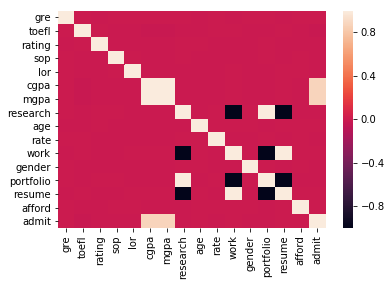

In [13]:
#Correlation Matrix
#create correlation matrix without class
Tf_corr=df.iloc[:,:]

#Correlation Matrix 

corrmat=Tf_corr.corr()

#Features :columns and rows
sb.heatmap(corrmat, 
 xticklabels=corrmat.columns,
 yticklabels=corrmat.columns)

In [14]:
# import training set
body = client_10e3dfa569d64673a3c50397badabc76.get_object(Bucket='seniorprojectpart1-donotdelete-pr-hpbnt6q4gnewbx',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

training_set = pd.read_csv(body)
training_set=training_set.iloc[:,1:2].values

In [15]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# Geting the input and output
X_train= training_set[0:79998]
y_train= training_set[1:80000]

In [17]:
# Reshaping
X_train=np.reshape(X_train, (79998 , 1 , 1))

In [18]:
# importing the Keras libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
# initialize the RNN
regressor = Sequential()

In [20]:
# adding the input layer and LSTM layer
regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# adding the output layer
regressor.add(Dense( units=1 ))

In [22]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [23]:
# fitting the RNN to the training set
regressor.fit(X_train, y_train, batch_size=1024, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
79998/79998 [==============================] - 19s 241us/step - loss: 1.5817 - acc: 0.0000e+00
Epoch 2/10
79998/79998 [==============================] - 23s 290us/step - loss: 1.1465 - acc: 0.0120
Epoch 3/10
79998/79998 [==============================] - 27s 340us/step - loss: 0.8240 - acc: 0.0344
Epoch 4/10
79998/79998 [==============================] - 32s 405us/step - loss: 0.5857 - acc: 0.0344
Epoch 5/10
79998/79998 [==============================] - 30s 377us/step - loss: 0.4134 - acc: 0.0344
Epoch 6/10
79998/79998 [==============================] - 31s 386us/step - loss: 0.2924 - acc: 0.0344
Epoch 7/10
79998/79998 [==============================] - 32s 405us/step - loss: 0.2108 - acc: 0.0344
Epoch 8/10
79998/79998 [==============================] - 30s 380us/step - loss: 0.1586 - acc: 0.0344
Epoch 9/10
79998/79998 [==============================] - 31s 381us/step - loss: 0.1272 - acc: 0.0344
Epoch 10/10
79998/79998 [=====

In [24]:
# import test set
body = client_10e3dfa569d64673a3c50397badabc76.get_object(Bucket='seniorprojectpart1-donotdelete-pr-hpbnt6q4gnewbx',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_set = pd.read_csv(body)
actual_admit=test_set.iloc[2:202,15:16].values

In [25]:
test_set.head()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit
0,291,113,3,3,2,9.04,3.424,1,23,45,0,0,1,0,1,0.84
1,340,94,5,5,3,9.65,3.790,0,34,18,1,0,0,1,0,0.92
2,337,107,4,2,5,8.87,3.322,1,33,46,0,0,1,0,0,0.76
3,307,107,2,5,2,8.00,2.800,0,28,15,1,1,0,1,0,0.72
4,327,107,4,5,4,8.67,3.202,1,45,60,0,1,1,0,0,0.80


In [34]:
#Visualizing Data using Matplotlib
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [26]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
test_set=sc.fit_transform(actual_admit)

In [27]:
# Geting the Predicted Chance of Admittance
inputs = actual_admit

In [28]:
# chaning the inputs for the NN
inputs = sc.transform(inputs)

In [29]:
# Reshaping the dimension of the neural net
inputs = np.reshape(inputs,(200,1,1))

In [30]:
# predict on the test data 
predicted_admit = regressor.predict(inputs)

In [31]:
# taking the inverse of the transformed data
predicted_admit = sc.inverse_transform(predicted_admit)

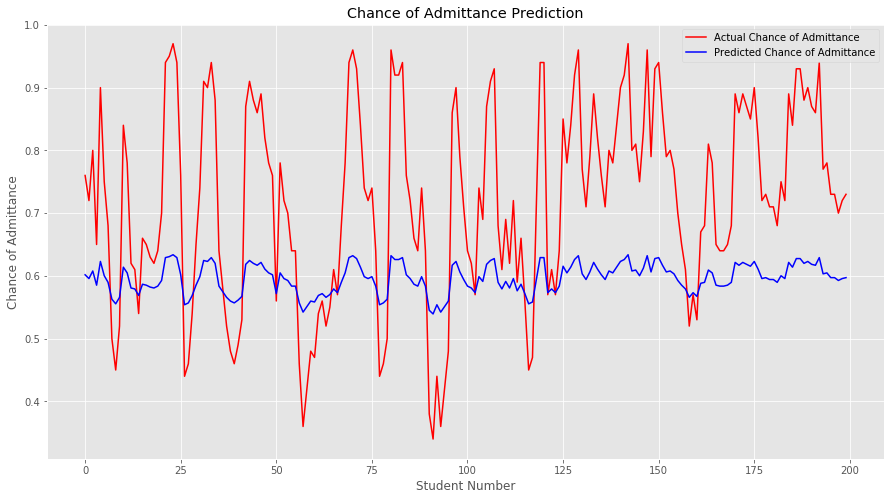

In [54]:
# Visualising the Result 
plt.figure(figsize=[15,8])
plt.plot( actual_admit , color = 'red' , label = 'Actual Chance of Admittance')
plt.plot( predicted_admit , color = 'blue' , label = 'Predicted Chance of Admittance')
plt.title('Chance of Admittance Prediction')
plt.xlabel( 'Student Number' )
plt.ylabel( 'Chance of Admittance' )
plt.legend()
plt.show()

In [37]:
# Dataset for ANN Algorithm
df.head()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit
0,328,113,2,4,3,9.65,3.790,1,36,6,0,0,1,0,0,0.92
1,297,93,2,2,1,8.87,3.322,1,37,12,0,0,1,0,0,0.76
2,335,97,3,2,3,8.00,2.800,0,26,23,1,0,0,1,1,0.72
3,294,107,5,5,2,8.67,3.202,0,16,61,1,1,0,1,1,0.80
4,317,92,2,3,3,8.21,2.926,0,24,66,1,1,0,1,1,0.65


In [38]:
# Creating an attribute with Chance of Admittance as a Binary value
def modiffy(row):
    if row['admit'] >0.75 :
        return 1
    else :
        return 0
df['Admit'] = df.apply(modiffy,axis=1)

In [55]:
# Final Dataset
df.head()

,gre,toefl,rating,sop,lor,cgpa,mgpa,research,age,rate,work,gender,portfolio,resume,afford,admit,Admit
0,328,113,2,4,3,9.65,3.790,1,36,6,0,0,1,0,0,0.92,1
1,297,93,2,2,1,8.87,3.322,1,37,12,0,0,1,0,0,0.76,1
2,335,97,3,2,3,8.00,2.800,0,26,23,1,0,0,1,1,0.72,0
3,294,107,5,5,2,8.67,3.202,0,16,61,1,1,0,1,1,0.80,1
4,317,92,2,3,3,8.21,2.926,0,24,66,1,1,0,1,1,0.65,0


In [39]:
# Selecting X and y variables for model building 
X=df.iloc[:,0:16].values

y=df.iloc[:,16].values

In [40]:
# Training and test set split with 80% training and 20% test set
from sklearn.model_selection import train_test_split   
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [41]:
# Normailize the dataframe
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [42]:
# Import Deep Learning packages
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

In [43]:
# Initialising the ANN
classifier_6=Sequential()

In [44]:
# Adding the input layer and the first hidden layer
classifier_6.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=16))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=6, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [45]:
# Adding the second layer
classifier_6.add(Dense(output_dim=5,init='uniform',activation='relu'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [46]:
# Adding the output layer
classifier_6.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [47]:
# Compiling the ANN
classifier_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
# Fitting the ANN to training set
classifier_6.fit(X_train, y_train,batch_size=1024,nb_epoch=15)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/15
80000/80000 [==============================] - 69s 866us/step - loss: 0.6855 - acc: 0.5785
Epoch 2/15
80000/80000 [==============================] - 70s 879us/step - loss: 0.6164 - acc: 0.5800
Epoch 3/15
80000/80000 [==============================] - 65s 813us/step - loss: 0.4866 - acc: 0.5924
Epoch 4/15
80000/80000 [==============================] - 69s 861us/step - loss: 0.3993 - acc: 0.9130
Epoch 5/15
80000/80000 [==============================] - 67s 840us/step - loss: 0.3501 - acc: 0.9343
Epoch 6/15
80000/80000 [==============================] - 65s 809us/step - loss: 0.3129 - acc: 0.9481
Epoch 7/15
80000/80000 [==============================] - 66s 823us/step - loss: 0.2815 - acc: 0.9598
Epoch 8/15
80000/80000 [==============================] - 67s 838us/step - loss: 0.2552 - acc: 0.9713
Epoch 9/15
80000/80000 [==============================] - 66s 819us/step - loss: 0.2326 - acc: 0.9812
Epoch 10/15
80000/80000 [==============================] - 66s 822us/step - loss: 

In [49]:
# Predicting the test set results
y_pred=classifier_6.predict(X_test)
y_pred=(y_pred>0.75)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

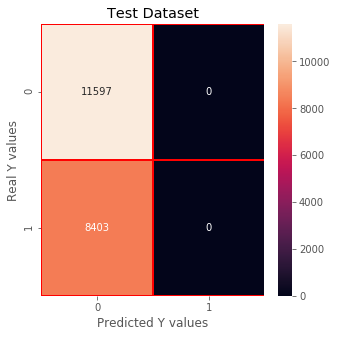

In [50]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix  
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test Dataset")
plt.xlabel("Predicted Y values")
plt.ylabel("Real Y values")
plt.show()

In [51]:
# Correct predictions= 11597-1=11596

# Wrong predictions = 8404+0=8404

# Accuracy of Prediction =(11596/20000)*100 = 60%